# Task 5 - Text Classification
**Candidate Name:** Bathula Sai Teja  
**Date/Time:** 2025-09-27

Shape of dataset: (100000, 18)

First 5 rows:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-09-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"This inquiry was not authorized by me, and I d...",NaN,"EQUIFAX, INC.",CA,90706,NaN,Consent provided,Web,2024-09-28,Closed with non-monetary relief,Yes,NaN,10286930
1,2025-08-22,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",AL,36117,NaN,NaN,Web,2025-08-22,In progress,Yes,NaN,15467240
2,2024-06-11,Credit reporting or other personal consumer re...,Credit reporting,Credit monitoring or identity theft protection...,Problem canceling credit monitoring or identif...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33180,NaN,Consent not provided,Web,2024-06-11,Closed with non-monetary relief,Yes,NaN,9236065
3,2025-08-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",PR,00771,NaN,NaN,Web,2025-08-20,In progress,Yes,NaN,15394041
4,2024-10-03,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",NaN,XXXXX,NaN,Consent not provided,Web,2024-10-03,Closed with non-monetary relief,Yes,NaN,10338303



Missing values per column:
Date received                       0
Product                             0
Sub-product                      1555
Issue                               0
Sub-issue                        6555
Consumer complaint narrative    68953
Company public response         48719
Company                             0
State                             432
ZIP code                          208
Tags                            94044
Consumer consent provided?      16311
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?              94612
Complaint ID                        0
dtype: int64


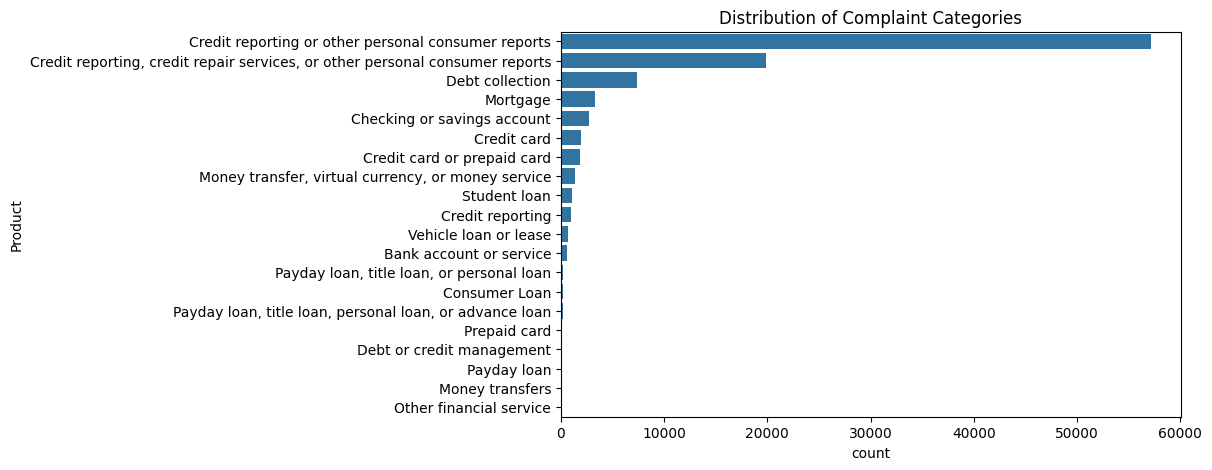


Average complaint length: 310.22594


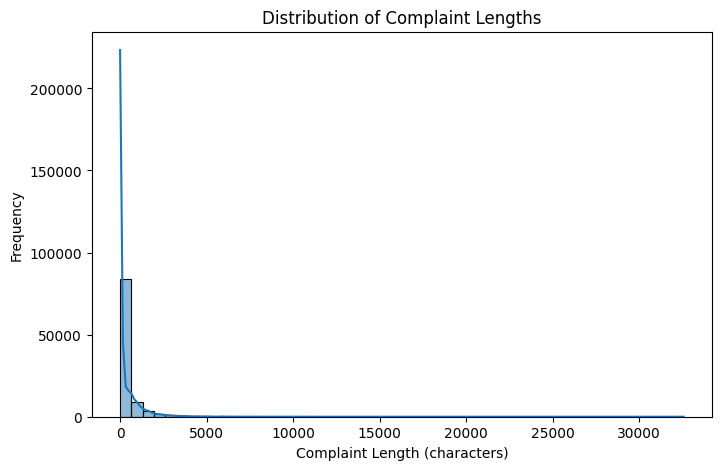


Final dataset shape (after filtering categories): (30750, 21)
Category counts:
label
0    19833
1     7423
3     3268
2      226
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Path to 100k sample dataset
data_path = "../data/consumer_complaints_sample.csv"
# Load dataset
df = pd.read_csv(data_path)
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())
# Category distribution (Product column)
plt.figure(figsize=(8,5))
sns.countplot(y="Product", data=df, order=df["Product"].value_counts().index)
plt.title("Distribution of Complaint Categories")
plt.show()
# Average complaint text length
df["complaint_length"] = df["Consumer complaint narrative"].astype(str).apply(len)
print("\nAverage complaint length:", df["complaint_length"].mean())
plt.figure(figsize=(8,5))
sns.histplot(df["complaint_length"], bins=50, kde=True)
plt.title("Distribution of Complaint Lengths")
plt.xlabel("Complaint Length (characters)")
plt.ylabel("Frequency")
plt.show()
# Feature engineering: combine relevant columns
df["text"] = (
    df["Product"].astype(str) + " " +
    df["Issue"].astype(str) + " " +
    df["Consumer complaint narrative"].astype(str)
)
# Map categories to numeric labels
category_map = {
    "Credit reporting, credit repair services, or other personal consumer reports": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df = df[df["Product"].isin(category_map.keys())]  # keep only 4 categories
df["label"] = df["Product"].map(category_map)

print("\nFinal dataset shape (after filtering categories):", df.shape)
print("Category counts:")
print(df["label"].value_counts())


# Task 5 - Text Classification
**Candidate Name:** Bathula Sai Teja  
**Date/Time:** 2025-09-27